# Import Libraries

In [103]:
import numpy as np
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
import matplotlib.pyplot as plt

# Load Data

In [104]:
# Generate ad hoc dataset (a simple toy dataset)
feature_dim = 2
train_X, train_y, test_X, test_y, adhoc_total = ad_hoc_data(
    training_size=40,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True
)

# Create Quantum Kernel

In [105]:
# Create a quantum kernel
quantum_kernel = FidelityQuantumKernel(
    fidelity=ComputeUncompute(sampler=Sampler()),
    feature_map=ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")
)

# Create QSVC

In [106]:
# QSVC Algorithm
qsvm = QSVC(quantum_kernel=quantum_kernel)

# Train QSVC
qsvm.fit(train_X, train_y)

# Test QSVC
score = qsvm.score(test_X, test_y)

# Print classification accuracy
print(f"Accuracy: {score}")

Accuracy: 1.0


# Plot Result

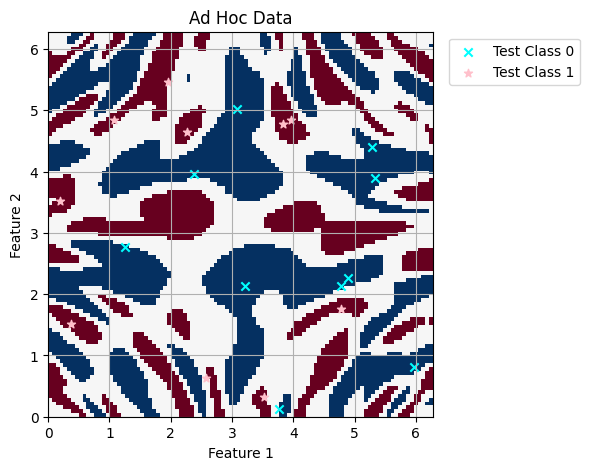

In [109]:
# Predict the test data
prediction = qsvm.predict(test_X)
test_class_0 = [x for i, x  in enumerate(test_X) if prediction[i] == 0]
test_class_1 = [x for i, x in enumerate(test_X) if prediction[i] == 1]

# Plot the data
plt.figure(figsize=(5, 5))
plt.ylim(0, 2 * np.pi)
plt.xlim(0, 2 * np.pi)
plt.imshow(
    np.asmatrix(adhoc_total).T,
    interpolation="nearest",
    origin="lower",
    cmap="RdBu",
    extent=[0, 2 * np.pi, 0, 2 * np.pi],
)

# Plot the test data
plt.scatter(*zip(*test_class_0), marker='x', color='cyan', label='Test Class 0')
plt.scatter(*zip(*test_class_1), marker='*', color='pink', label='Test Class 1')

# Set plot settings
plt.title("Ad Hoc Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(bbox_to_anchor=(1.4,1), loc="upper right")
plt.grid(True)
plt.show()